In [31]:
from humanitarian_crisis_predictor import *

https://www.gdeltproject.org/data/lookups/FIPS.country.txt

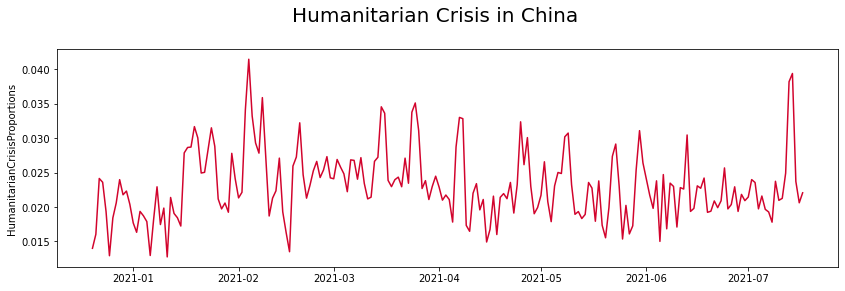

In [32]:
new_model  = HumanitarianCrisisModel(country_code='CH', frequency='d', 
                                     forecast_column='HumanitarianCrisisProportions', event_count=1000000)
new_model.plot_original_data()

Results of Dickey-Fuller Test:
Test Statistic          -8.010848e+00
p-value                  2.203542e-12
# Lags Used              1.000000e+00
# of Obs Used            2.080000e+02
Critiical Values: 1%    -3.462186e+00
Critiical Values: 5%    -2.875538e+00
Critiical Values: 10%   -2.574231e+00
dtype: float64


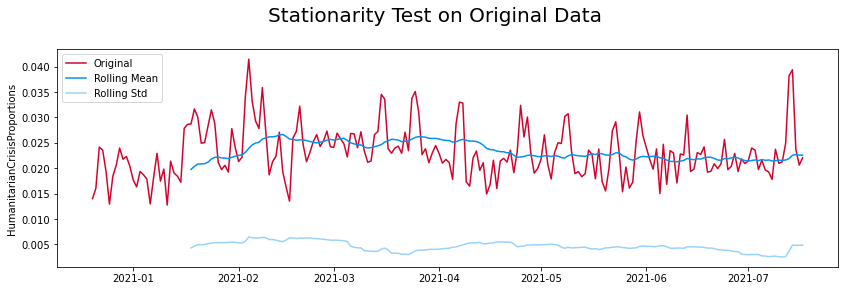

In [33]:
ts = new_model.humanitarian_crisis_ts
new_model.stationarity_test(ts=ts, window=30, title='Stationarity Test on Original Data')


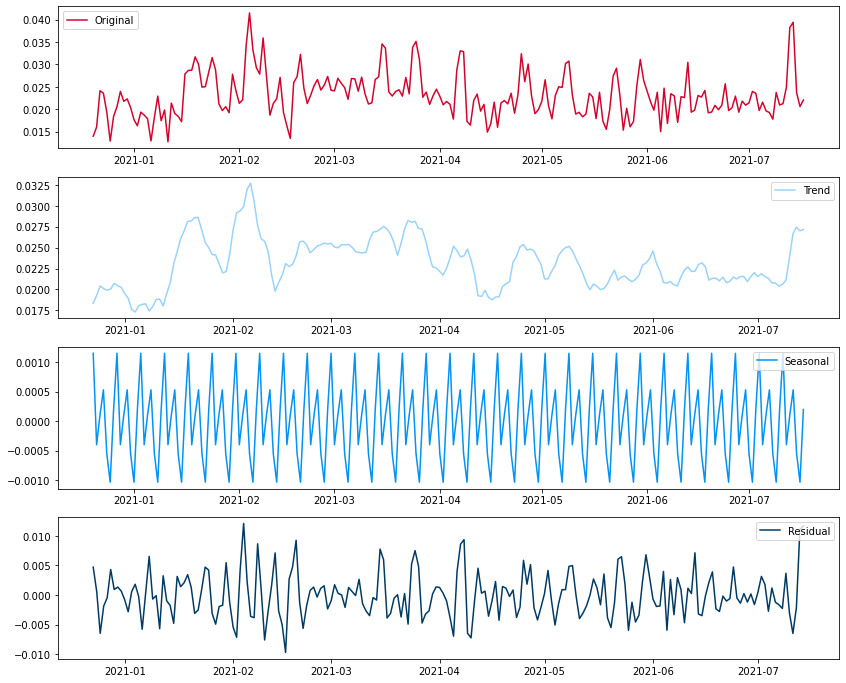

In [34]:
new_model.decompose_ts()

Results of Dickey-Fuller Test:
Test Statistic          -7.296533e+00
p-value                  1.373306e-10
# Lags Used              1.500000e+01
# of Obs Used            1.880000e+02
Critiical Values: 1%    -3.465620e+00
Critiical Values: 5%    -2.877040e+00
Critiical Values: 10%   -2.575032e+00
dtype: float64


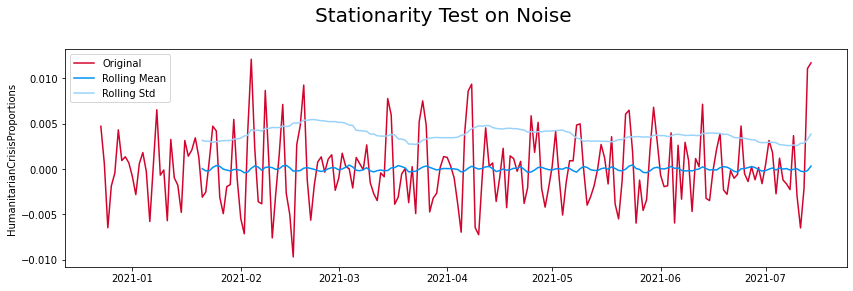

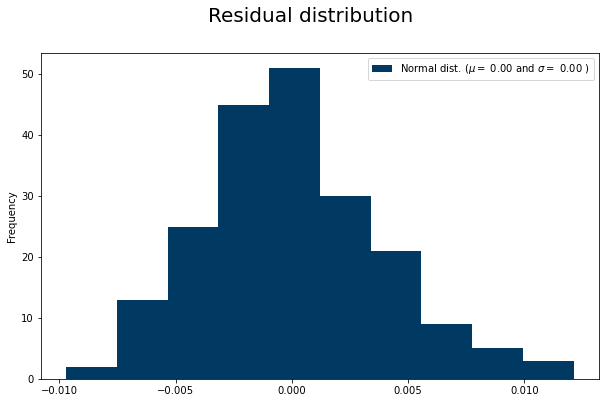

In [35]:
resid = new_model.residual
new_model.stationarity_test(ts=resid, window=30, title='Stationarity Test on Noise')
new_model.plot_residual()

In [36]:
new_model.run_auto_arima()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                      y   No. Observations:                  210
 Model:               SARIMAX(2, 0, 0)   Log Likelihood                 851.006
 Date:                Sat, 17 Jul 2021   AIC                          -1694.013
 Time:                        12:13:32   BIC                          -1680.624
 Sample:                             0   HQIC                         -1688.600
                                 - 210                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 intercept      0.0122      0.001      8.201      0.000       0.009       0.015
 ar.L1          0.6035      0.064      9.444      0.000       0.478   

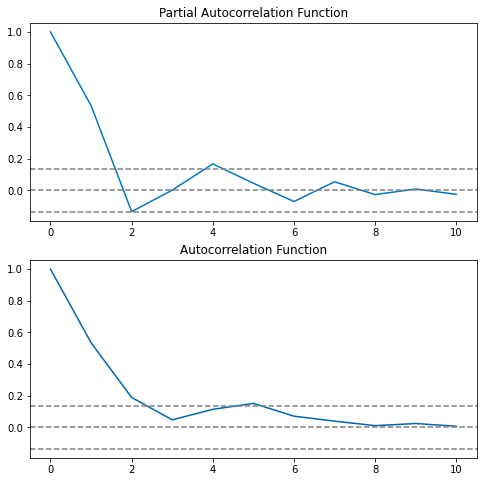

In [37]:
new_model.plot_pacf_acf()

In [38]:
new_model.run_best_ARIMA_model()

(<statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x7fde6997eb50>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                     ARMA Model Results                                   
 Dep. Variable:     HumanitarianCrisisProportions   No. Observations:                  210
 Model:                                ARMA(2, 0)   Log Likelihood                 851.017
 Method:                                  css-mle   S.D. of innovations              0.004
 Date:                           Sat, 17 Jul 2021   AIC                          -1694.035
 Time:                                   12:13:33   BIC                          -1680.646
 Sample:                               12-20-2020   HQIC                         -1688.622
                                     - 07-17-2021                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------------------

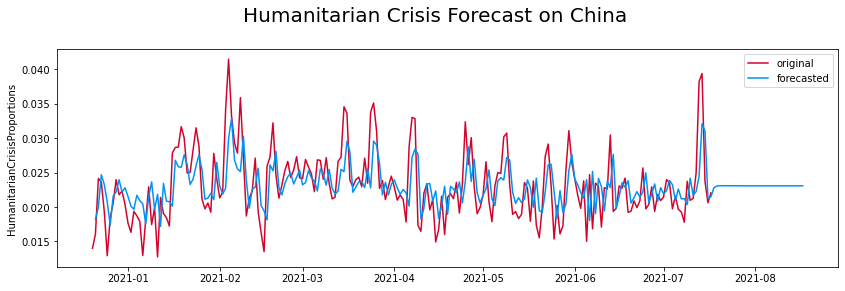

In [39]:
new_model.predict(30)

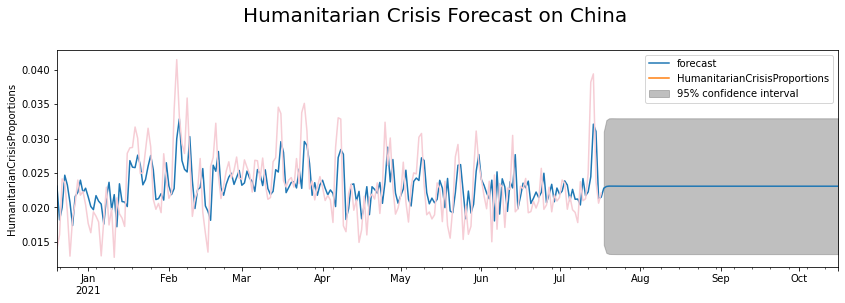

In [40]:
fig = new_model.predict_with_ci(90)